# Greenest City Projects - A Statistical Inference

By: Ankur Bhardwaj, Uliana Ryazanova, and Ayush Vora - Group 43

## Introduction

(Insert Introduction Here)

## Preliminary Results

In [3]:
## Import Required Libraries and Data
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)
data <- read.csv("https://raw.githubusercontent.com/ayushtvora/stat-201-project/main/data/greenest-city-projects.csv", sep = ";")
## Source for Data: https://opendata.vancouver.ca/explore/dataset/greenest-city-projects/information/

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [4]:
## Tidy and Wrangle Data
tidy_data <- data |> 
    select(project_funder = CATEGORY1) # Selecting only Relavent Data
    # select(name = NAME, project_funder = CATEGORY1, project_type =  CATEGORY2) #  Selecting columns with extra data
head(tidy_data)

,project_funder
,<chr>
1,City projects
2,City projects
3,Private projects
4,Private projects
5,Private projects
6,Private projects


In [5]:
## Calculating the Proportion
phat <- tidy_data |> 
    mutate(project_funder = (project_funder == "Greenest City Fund Project")) |> # Sets values that are success to true, false otherwise.
    specify(response = project_funder, success = "TRUE") |> # Using infer package to find the proportion
    calculate(stat = "prop") |>
    pull()

"The proportion of Greenest City Fund Projects to all projects is:"
phat

[1] "The proportion of Greenest City Fund Projects to all projects is:"

[1] 0.4475309

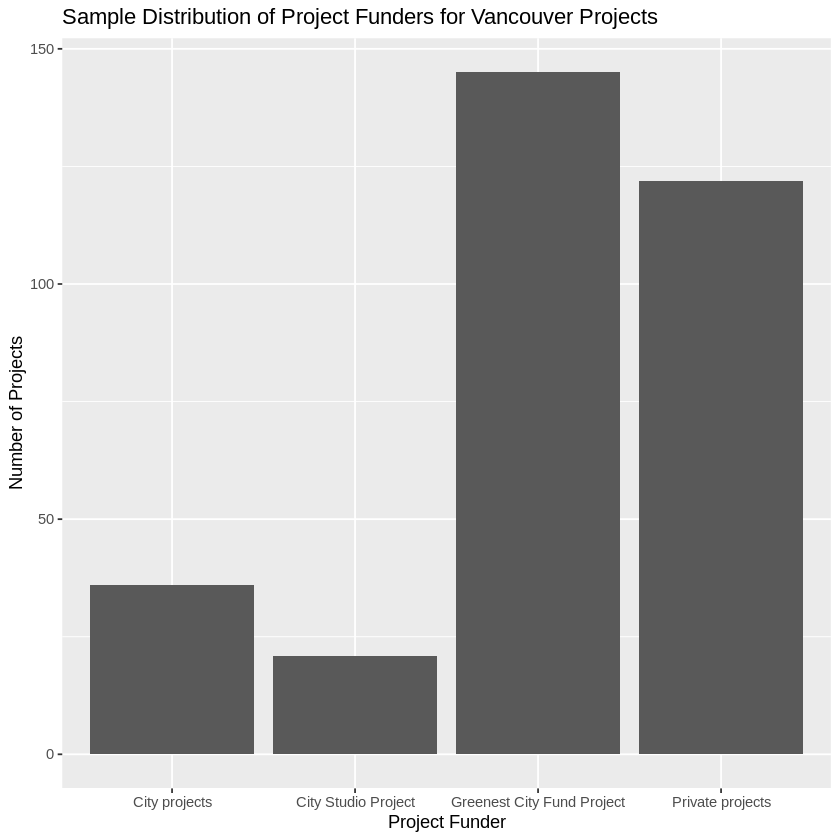

In [17]:
## Graphing the Raw Data
raw_project_funders_graph <- tidy_data |> 
    ggplot() +
    geom_bar(aes(x = project_funder)) +
    ggtitle("Sample Distribution of Project Funders for Vancouver Projects") +
    xlab("Project Funder") +
    ylab("Number of Projects") 

raw_project_funders_graph

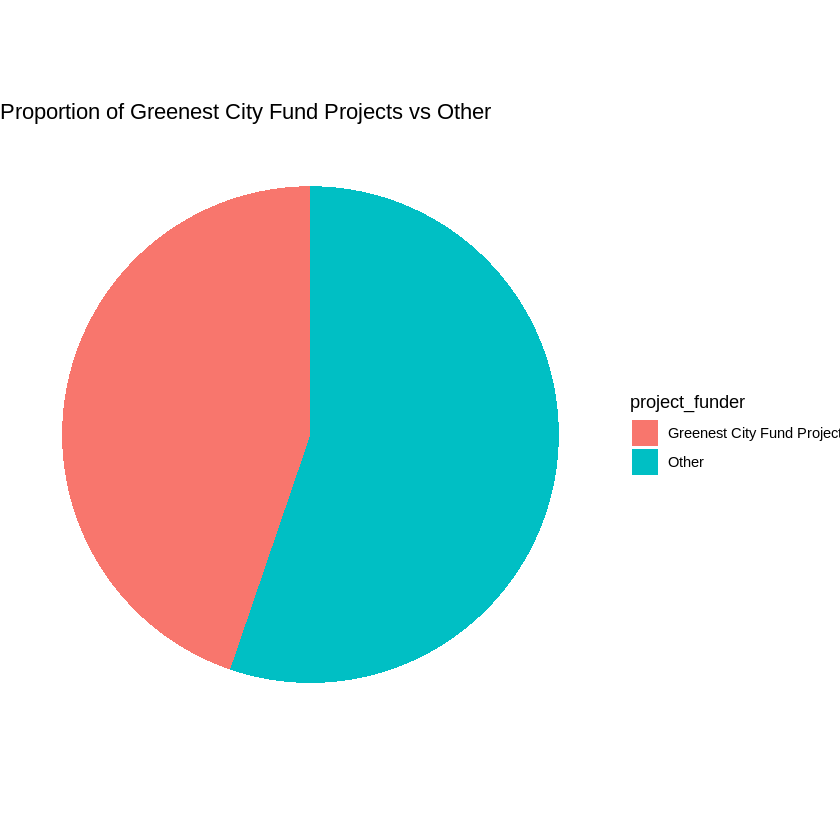

In [48]:
## Graphing the Proportion Differences
raw_proportion_graph <- tidy_data |> 
    mutate(project_funder = (project_funder == "Greenest City Fund Project")) |> 
    mutate(project_funder = str_replace(project_funder, "FALSE", "Other")) |> 
    mutate(project_funder = str_replace(project_funder, "TRUE", "Greenest City Fund Project")) |> 
    group_by(project_funder) |>
    summarize(n = n()) |>
    ggplot() +
    geom_bar(stat = "identity", aes(x = "", y = n, fill = project_funder)) +
    coord_polar("y", start=0) +
    ggtitle("Proportion of Greenest City Fund Projects vs Other") +
    theme_void()

raw_proportion_graph

## Methods

### Plan

(Insert Plan Here)

## Works Cited

Add your works cited here. We need at least 2